obj val:  6.889886726971486
orginal airports:  [(0.49349272701465763, 0.6203639657778528), (0.852291446547383, 0.10165775519205911), (0.8540512467400417, 0.9448973519200502)]
gradients for airport  0   -1.4985601216594404 -0.1452955684901029
gradients for airport  1   -0.21557500043222497 -1.3011342910176853
gradients for airport  2   0.050872763798478875 1.7331288037788999
airports:  [(1.992052848674098, 0.7656595342679557), (1.067866446979608, 1.4027920462097443), (0.8031784829415629, -0.7882314518588497)]
72.77162540860742
airport cords [(1.992052848674098, 0.7656595342679557), (1.067866446979608, 1.4027920462097443), (0.8031784829415629, -0.7882314518588497)]
cityA:  {(1.1098942505788445, 0.31552545209721544)}
cityB:  {(0.8369831597848776, 0.5636219169976769), (0.8306721401345544, 0.7616620421159038), (0.7658792625487856, 0.6741306424574947), (0.8590367592465215, 0.45426691167087774), (0.8024982838025394, 0.649701585458005), (0.8194850939133214, 0.5742217118488839), (0.775488827867

<module 'matplotlib.pyplot' from '/Users/michaelching/PycharmProjects/CECS 451/Assignment #5/venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

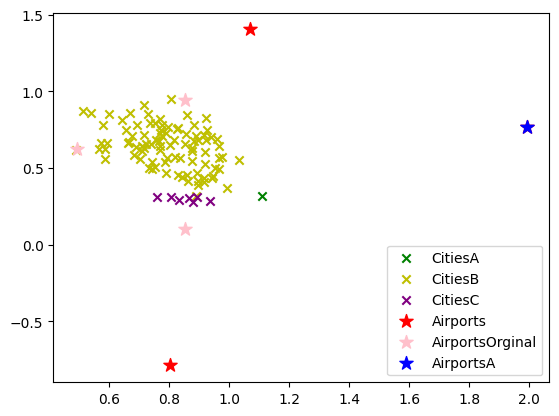

In [76]:
import math
import random
import numpy as np


def findClosestCity(cities, airports, cityA, cityB, cityC):

    #Empty sets
    cityA.clear()
    cityB.clear()
    cityC.clear()

    #For all cities
    for city in cities:

        cityXCord = city[0]
        cityYCord = city[1]
        distance = 100000000
        airportNum = -1

        #For each airport see which is closest to city
        for i in range (num_air):

            airportXCord = airports[i][0]
            airportYCord = airports[i][1]

            #Distance formula
            tempCal = math.sqrt( (airportXCord - cityXCord)**2 + (airportYCord - cityYCord)**2 )

            #Found an airport closer to city
            if(tempCal < distance):
                distance = tempCal
                airportNum = i


        if(airportNum == 0):
            cityA.add(city)

        if(airportNum == 1):
            cityB.add(city)

        if(airportNum == 2):
            cityC.add(city)


#Calculates the objective funciton value
def objectiveFunct(closeCityList, airports):
    totalDistance = 0

    #For each airport
    for i in range(len(airports)):

        airportXCord = airports[i][0]
        airportYCord = airports[i][1]


        #For each set of cities closest to an airport
        for city in closeCityList[i]:
            cityXCord = city[0]
            cityYCord = city[1]

            x = (airportXCord - cityXCord)**2
            y = (airportYCord - cityYCord)**2
            totalDistance = totalDistance + x + y


    return totalDistance


num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y))



#Create set of cities for closest airport
cityA = set()
cityB =  set()
cityC = set()

closeCityList = []
closeCityList.append(cityA)
closeCityList.append(cityB)
closeCityList.append(cityC)
findClosestCity(cities, airports, cityA, cityB, cityC)
val = objectiveFunct(closeCityList, airports)
print('obj val: ', val)

objVals = []
prevObjVal = 0


temp1 = airports[0]
temp2 = airports[1]
temp3 = airports[2]
airportOrgin = []
airportOrgin.append(temp1)
airportOrgin.append(temp2)
airportOrgin.append(temp3)


#Check the objective function value changes
change = 10
print('orginal airports: ', airports)

#Repeat objective function till miniminal change
while (change > 0.5):

    findClosestCity(cities, airports, cityA, cityB, cityC)
    val = objectiveFunct(closeCityList, airports)
    change = abs(val - prevObjVal)
    prevObjVal = val

    #For each airport
    for i in range(len(airports)):
        airportXCord = airports[i][0]
        airportYCord = airports[i][1]

        #Calculate summations for each individual city and individual axis
        summationX = 0
        summationY = 0

        #For each city closest to a particular airport
        for city in closeCityList[i]:
            cityXCord = city[0]
            cityYCord = city[1]

            summationX = summationX + (airportXCord - cityXCord)
            summationY = summationY + (airportYCord - cityYCord)

        #After completing summations, multiply by 2 b/c of partial deritives
        gradientX = summationX * 2
        gradientY = summationY * 2

        #Multiply with small constant
        gradientX = gradientX * sigma
        gradientY = gradientY * sigma

        print('gradients for airport ', i , ' ', gradientX, gradientY)

        #Update location of airport
        newLocX = airportXCord - gradientX
        newLocY = airportYCord - gradientY
        airports[i] = (newLocX, newLocY)

    print('airports: ', airports)
    change = 0







findClosestCity(cities, airports, cityA, cityB, cityC)
val = objectiveFunct(closeCityList, airports)
print(val)





#Repeat objective function
#while (change < 0.5):
#for i in range(2):
#
    #Find/update the cities closest to an airport
#    findClosestCity(airports, cityA, cityB, cityC)
#    val = objectiveFunct(closeCityList, airports)
#    print('obj val: ', val)

    #Airport A
#    airportX = airports[0][0]
#    airportY = airports[0][1]
 #   print(airports)
 #   print('airportCords', 'x: ', airportX , ' y: ' , airportY)
#    x = 0
#    y = 0
#    print("Cities closest to Airport A" , cityA)
#    print()
#    print()

#    for city in cityA:
#        x = x + (airportX - city[0])
#        y = y + (airportY - city[1])
#        print('x' , x)
#        print('y' , y)
#
#    x = x * 2
#    y = y * 2

 #   print('x' , x)
#    print('airport x cord', airports[0][0])
#    print('sigma*: ', (sigma * x))

#    gradX = airports[0][0] - (sigma * x)
#    gradY = airports[0][1] - (sigma * y)
#    print ('gradX', gradX)
#    print ('gradY', gradY)

#    airports[0] = (gradX,gradY)
#    print("airport0", airports[0])






#airports[1] = (0,0)
#airports[2] = (0,0)




#Implement gradient
#for i in range(num_air):

 #   airportX = airports[i][0]
  #  airportY = airports[i][1]

   # x = 0
    #y = 0

   # for city in cities:
   #     x = x + (airportX - city[0])**2
   #     y = y + (airportY - city[1])**2


   # x = airports[i][0] - (sigma * x)
   # y = airports[i][1] - (sigma * y)
   # airports[i] = (x,y)



print ('airport cords', airports)

print('cityA: ', cityA)
print('cityB: ', cityB)
print('cityC: ', cityC)

import matplotlib.pyplot as plt

zip_citiesA = zip(*cityA)
plt.scatter(*zip_citiesA, marker='x',color='green', label='CitiesA')

zip_citiesB = zip(*cityB)
plt.scatter(*zip_citiesB, marker='x',color='y', label='CitiesB')

zip_citiesC = zip(*cityC)
plt.scatter(*zip_citiesC, marker='x',color='purple', label='CitiesC')

#zip_cities = zip(*cities)
#plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')

zip_airsOrgin = zip(*airportOrgin)
plt.scatter(*zip_airsOrgin, marker='*', color='pink', s=100, label='AirportsOrginal')

plt.scatter(airports[0][0], airports[0][1], marker='*', color='blue', s=100, label='AirportsA')

#plt2 = plt.plot(objVals)
#plt2.show()

plt.legend()
plt